<a href="https://colab.research.google.com/github/idarapatrick/Probability-And-Gradient-Descent-Group-6/blob/main/Probability_Distributions_Group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability Distributions**

## **Part 1 - Exponential Probability**

REAL WORLD QUESTION:
A checkout counter at a supermarket completes the service process according to an exponential distribution with a service rate of 6 customers per hour. A customer arrives at the checkout counter.
- a) Find the parameter of interest, lamda (λ)
- b) Find the probability that the service is completed in fewer than 5 minutes
- c) Find the probability that the customer leaves the checkout counter more than 10 minutes after arriving
- d) Find the probability that the service is completed in a time between 5 and 8 minutes

In [29]:
# a) Finding the parameter of interest, lambda
"""
The parameter of interest is the average, sigma. The probaility questions appear in minutes,
so lamda will be converted to minutes
"""
# There are 6 customers per 60 minutes

lambda_param = 6 / 60
lambda_param

0.1

Therefore, the rate is 0.1 per 60 minutes.

- a) Parameter of interest = 0.1

In [30]:
e = 2.718

# function to calculate events less than
def prob_less_than(x, e, lambda_param):
    """
    Reusuable function to calculate the probability of events less than x
    """
    return 1 - e ** (-lambda_param * x)

# function to calculate events greater than
def prob_greater_than(x, e, lambda_param):
    """
    Reusuable function to calculate the probability of events greater than x
    """
    return e ** (-lambda_param * x)

# function to calculate events inbetween
def prob_between(x1, x2, e, lambda_param):
    """
    Reusuable function to calculate the probability of events between x1 and x2
    Arguments:
    x1 -- lower bound of the event time
    x2 -- upper bound of the event time
    """
    prob_x1 = prob_less_than(x1, e, lambda_param)
    prob_x2 = prob_less_than(x2, e, lambda_param)
    return prob_x2 - prob_x1

In [31]:
# The probability that the service completed is fewer than 5 minutes
# P(X < 5) = 1 = e ^ -lamda(x)
p_x_less_five = round(prob_less_than(5, e, lambda_param), 4)
five_percentage = round(p_x_less_five * 100, 2)

print(f"The probability of the service being completed in fewer than 5 minutes is {five_percentage}%, and the rate is {p_x_less_five}")

The probability of the service being completed in fewer than 5 minutes is 39.34%, and the rate is 0.3934


b) There is a 39.34% probability of the service being completed in fewer than 5 minutes, and a rate of 0.3934

In [32]:
## The Probability that the customer leaves the checkout counter more than 10 minutes after arriving
"""
Here, we check the probability of P(X > 10)
"""
p_x_more_ten = round(prob_greater_than(10, e, lambda_param), 4)
ten_percentage = round(p_x_more_ten * 100, 2)

print(f"The probability that the customer leaves the checkout counter more than 10 minutes after arriving is {ten_percentage}%, and the rate is {p_x_more_ten}")

The probability that the customer leaves the checkout counter more than 10 minutes after arriving is 36.79%, and the rate is 0.3679


c) The probability that the customer leaves the counter more than 10 minutes after arriving is 36.79% and a rate of 0.3679

In [33]:
## The probability that the service is completed between 5 and 8 minutes
"""
Here, we check the probability of P(X < 8) - P(X < 5)
"""

p_btwn_five_eight = round(prob_between(5, 8, e, lambda_param), 4)
btwn_percentage = round(p_btwn_five_eight * 100, 2)
print(f"The probability that the service is completed between 5 and 8 minutes is {btwn_percentage}%, and the rate is {p_btwn_five_eight}")

# Single out the probability of the service being less than 8 minutes for the visualization

p_x_less_eight = round(prob_less_than(8, e, lambda_param), 4)
eight_percentage = round(p_x_less_eight * 100, 2)

p_x_less_eight, eight_percentage

The probability that the service is completed between 5 and 8 minutes is 15.72%, and the rate is 0.1572


(0.5506, 55.06)

d) The probability that the service is completed between 5 and 8 minutes is 15.72%, and the rate is 0.1572

**Interpretation**

- Mean service time: 10 minutes per customer
- 39.34% chance service takes less than 5 minutes
- 36.79% chance service takes more than 10 minutes
- 15.72% chance service takes between 5-8 minutes

# Implementing The Probability Density Function

In [34]:
def exponential_pdf(x):
    """
    Probability Density Function for exponential distribution
    f(x) = λ * e^(-λ*x)
    """
    if x < 0:
        return 0
    return lambda_param * (e ** (-lambda_param * x))

# Test the Probability Density Function
print(f"\nPDF at x=5: {round(exponential_pdf(5), 4)}")
print(f"PDF at x=10: {round(exponential_pdf(10), 4)}")


PDF at x=5: 0.0607
PDF at x=10: 0.0368


# **Making our visualizations with Matplotlib**

In [35]:
import matplotlib.pyplot as plt


In [36]:
# Create x values from 0 to 25 minutes
x_values = []
for i in range(251):  # 0 to 25 in steps of 0.1
    x_values.append(i * 0.1)

# Calculate PDF values for plotting
pdf_values = []
for x in x_values:
    pdf_values.append(exponential_pdf(x))

# Calculate Communlative Density Formula values for plotting
cdf_values = []
for x in x_values:
    if x == 0:
        cdf_values.append(0)
    else:
        cdf_values.append(1 - e ** (-lambda_param * x))

# The visualization
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

(0.0, 25.0)

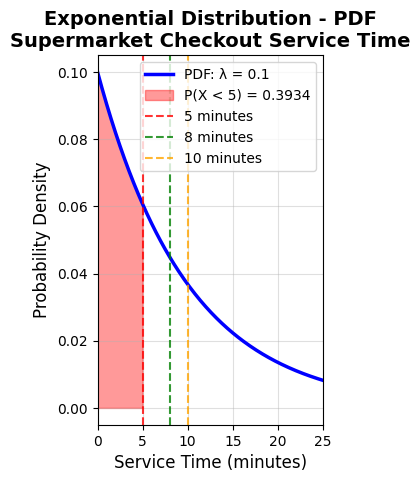

In [37]:
# Plot 1: PDF (Probability Density Function)
plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, 'blue', linewidth=2.5, label=f'PDF: λ = {lambda_param}')
plt.title('Exponential Distribution - PDF\nSupermarket Checkout Service Time', fontsize=14, fontweight='bold')
plt.xlabel('Service Time (minutes)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True, alpha=0.4)

# Highlight area for P(X < 5) in red
x_fill = []
pdf_fill = []
for x in x_values:
    if x <= 5:
        x_fill.append(x)
        pdf_fill.append(exponential_pdf(x))

plt.fill_between(x_fill, pdf_fill, alpha=0.4, color='red',
                label=f'P(X < 5) = {p_x_less_five}')

# Add vertical lines for reference
plt.axvline(x=5, color='red', linestyle='--', alpha=0.8, label='5 minutes')
plt.axvline(x=8, color='green', linestyle='--', alpha=0.8, label='8 minutes')
plt.axvline(x=10, color='orange', linestyle='--', alpha=0.8, label='10 minutes')

plt.legend(fontsize=10)
plt.xlim(0, 25)

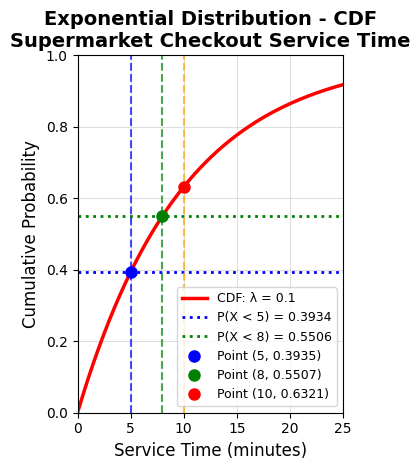

In [38]:
# Plot 2: CDF (Cumulative Distribution Function)
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, 'red', linewidth=2.5, label=f'CDF: λ = {lambda_param}')
plt.title('Exponential Distribution - CDF\nSupermarket Checkout Service Time', fontsize=14, fontweight='bold')
plt.xlabel('Service Time (minutes)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.grid(True, alpha=0.4)

# Add horizontal lines to show our calculated probabilities
plt.axhline(y=p_x_less_five, color='blue', linestyle=':', linewidth=2,
           label=f'P(X < 5) = {p_x_less_five}')
plt.axhline(y=p_x_less_eight, color='green', linestyle=':', linewidth=2,
           label=f'P(X < 8) = {p_x_less_eight}')

# Add vertical reference lines
plt.axvline(x=5, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=8, color='green', linestyle='--', alpha=0.7)
plt.axvline(x=10, color='orange', linestyle='--', alpha=0.7)

# Add points for our specific probabilities
plt.plot(5, p_x_less_five, 'bo', markersize=8, label='Point (5, 0.3935)')
plt.plot(8, p_x_less_eight, 'go', markersize=8, label='Point (8, 0.5507)')
plt.plot(10, 1-p_x_more_ten, 'ro', markersize=8, label='Point (10, 0.6321)')

plt.legend(fontsize=9)
plt.xlim(0, 25)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# EXPONENTIAL DISTRIBUTION ANALYSIS REPORT

**Real-world Problem: Supermarket Checkout Counter Analysis**

**Service Rate:** 6 customers per hour

### PARAMETER
**Lambda(λ)** = 0.1 customers per minute

### PROBABILITY CALCULATIONS
- a) Parameter λ = 0.1
- b) P(service < 5 min) = 0.3935 (39.35%)
- c) P(service > 10 min) = 0.3679 (36.79%)
- d) P(5 < service < 8 min) = 0.1572 (15.72%)



---
## BUSINESS INTERPRETATION

Average service time = 1/λ = 10.0

*   39.35% of customers will be served in under 5 minutes
*   36.79% of customers will wait more than 10 minutes
* 15.72% of customers will be served between 5-8 minutes
* Average service time = 1/λ = 10.0 minutes per customer



---
## SUMMARY
This analysis demonstrates the application of exponential distribution to model service times at a supermarket checkout counter. The results show that with a service rate of 6 customers per hour (λ = 0.1 per minute), customers can expect an average wait time of 10 minutes, with significant variation in individual service times as expected from the exponential distribution's memoryless property.



## **Part 2: Bayesian Probability**

### Scenario: COVID-19 Rapid Testing

**Scenario Parameters:**

Disease prevalence: 2% of population (prior probability)

Test sensitivity (True Positive Rate): 85%

Test specificity (True Negative Rate): 95%

False Positive Rate: 5%

**Question**: What is the probability a person actually has COVID-19 if they test positive on a rapid test?


=== Bayesian Update for COVID-19 Testing ===
Prevalence (Prior P(COVID)): 0.0200 (2.0%)
Sensitivity (True Positive Rate): 0.85
Specificity (True Negative Rate): 0.95

P(Positive | COVID) * P(COVID) = 0.85 * 0.02 = 0.0170
P(Positive | No COVID) * P(No COVID) = 0.05 * 0.9800 = 0.0490

P(Positive) = 0.0170 + 0.0490 = 0.0660

Posterior P(COVID | Positive) = 0.0170 / 0.0660 ≈ 0.2576 (25.8%)

**Interpretation:** Despite testing positive, there's only ~25.8% chance of actually having COVID-19
This is due to the relatively low prevalence and non-negligible false positive rate.


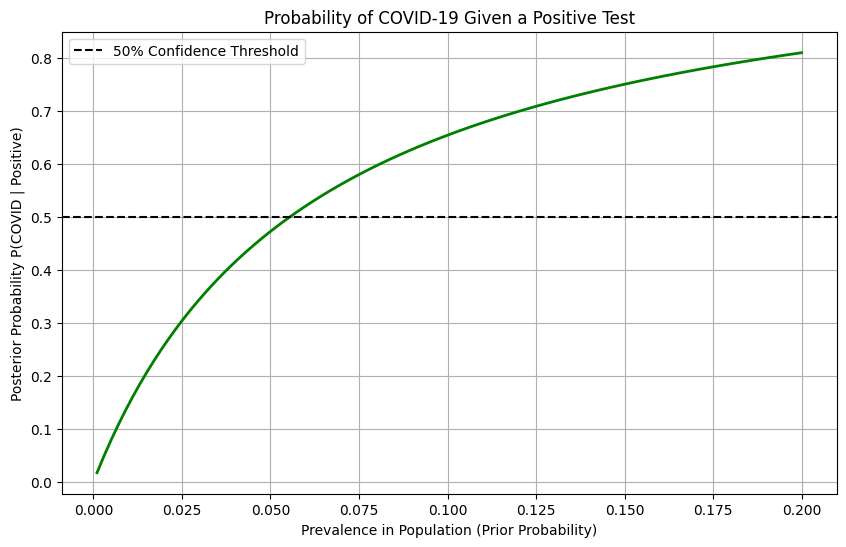

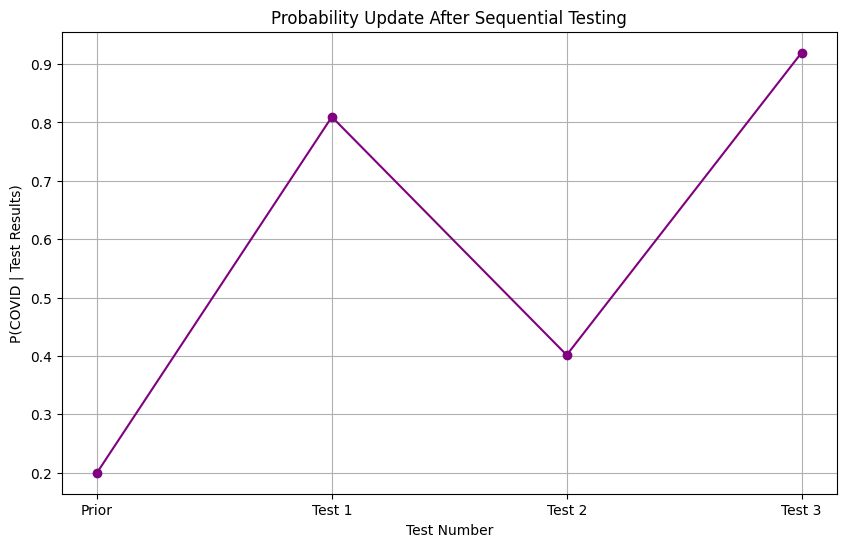

Updated probabilities: ['20.0%', '81.0%', '40.2%', '91.9%']


In [39]:
import numpy as np

class BayesianCOVIDTest:
    def __init__(self):
        # Set initial probabilities based on typical COVID-19 testing scenarios
        self.prevalence = 0.02  # 2% prevalence in population
        self.sensitivity = 0.85  # 85% true positive rate
        self.specificity = 0.95  # 95% true negative rate

    def calculate_posterior(self, prior=None):
        """Calculate P(COVID | Positive Test) using Bayes' Theorem."""
        if prior is not None:
            self.prevalence = prior

        # Calculate P(Positive | COVID) * P(COVID)
        true_positives = self.sensitivity * self.prevalence

        # Calculate P(Positive | No COVID) * P(No COVID)
        false_positives = (1 - self.specificity) * (1 - self.prevalence)

        # Calculate total probability of positive test
        p_positive = true_positives + false_positives

        # Apply Bayes' Theorem
        posterior = true_positives / p_positive

        return posterior

    def plot_posterior_vs_prevalence(self):
        """Visualize how posterior probability changes with disease prevalence."""
        prevalence_values = np.linspace(0.001, 0.2, 100)  # Range from 0.1% to 20% prevalence
        posteriors = [self.calculate_posterior(p) for p in prevalence_values]

        plt.figure(figsize=(10, 6))
        plt.plot(prevalence_values, posteriors, color='green', linewidth=2)
        plt.title("Probability of COVID-19 Given a Positive Test")
        plt.xlabel("Prevalence in Population (Prior Probability)")
        plt.ylabel("Posterior Probability P(COVID | Positive)")
        plt.grid(True)
        plt.axhline(y=0.5, color='black', linestyle='--', label="50% Confidence Threshold")
        plt.legend()
        plt.show()

    def sequential_testing(self, test_results):
        """Update belief after multiple tests using sequential Bayesian updates."""
        current_prior = self.prevalence
        probabilities = [current_prior]

        for result in test_results:
            if result == 'positive':
                likelihood = self.sensitivity
                false_positive_rate = 1 - self.specificity
            else:  # negative result
                likelihood = 1 - self.sensitivity  # False negative rate
                false_positive_rate = self.specificity  # True negative rate

            # Apply Bayes' theorem for each test result
            numerator = likelihood * current_prior
            denominator = numerator + false_positive_rate * (1 - current_prior)
            current_prior = numerator / denominator
            probabilities.append(current_prior)

        # Plot results showing probability updates
        plt.figure(figsize=(10, 6))
        plt.plot(probabilities, marker='o', linestyle='-', color='purple')
        plt.title("Probability Update After Sequential Testing")
        plt.xlabel("Test Number")
        plt.ylabel("P(COVID | Test Results)")
        plt.xticks(range(len(probabilities)), ['Prior'] + [f'Test {i+1}' for i in range(len(test_results))])
        plt.grid(True)
        plt.show()

        return probabilities

    def explain_bayesian_update(self):
        """Provide step-by-step explanation of Bayes' Theorem calculation."""
        print("\n=== Bayesian Update for COVID-19 Testing ===")
        print(f"Prevalence (Prior P(COVID)): {self.prevalence:.4f} ({self.prevalence*100}%)")
        print(f"Sensitivity (True Positive Rate): {self.sensitivity:.2f}")
        print(f"Specificity (True Negative Rate): {self.specificity:.2f}\n")

        true_positives = self.sensitivity * self.prevalence
        print(f"P(Positive | COVID) * P(COVID) = {self.sensitivity} * {self.prevalence} = {true_positives:.4f}")

        false_positives = (1 - self.specificity) * (1 - self.prevalence)
        print(f"P(Positive | No COVID) * P(No COVID) = {1 - self.specificity:.2f} * {1 - self.prevalence:.4f} = {false_positives:.4f}")

        p_positive = true_positives + false_positives
        print(f"\nP(Positive) = {true_positives:.4f} + {false_positives:.4f} = {p_positive:.4f}")

        posterior = true_positives / p_positive
        print(f"\nPosterior P(COVID | Positive) = {true_positives:.4f} / {p_positive:.4f} ≈ {posterior:.4f} ({posterior*100:.1f}%)")

        print(f"\n**Interpretation:** Despite testing positive, there's only ~{posterior*100:.1f}% chance of actually having COVID-19")
        print("This is due to the relatively low prevalence and non-negligible false positive rate.")

# Example usage and testing
if __name__ == "__main__":
    # Create instance of COVID test analyzer
    covid_test = BayesianCOVIDTest()

    # Show step-by-step explanation
    covid_test.explain_bayesian_update()

    # Visualize how posterior changes with prevalence
    covid_test.plot_posterior_vs_prevalence()

    # Test sequential testing with multiple test results
    test_results = ['positive', 'negative', 'positive']  # Example test sequence
    probabilities = covid_test.sequential_testing(test_results)
    print(f"Updated probabilities: {[f'{p*100:.1f}%' for p in probabilities]}")